In [2]:
import pandas as pd

from Preprocessing import preprocess_text

In [3]:
df = pd.read_csv('data/data_scopus_cleaned.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.head(500)


,abstract,title,DOI,created,score,URL,journal,data,cleaned_data
0,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,Supplementary files,10.3114/sim.2022.101.01supp,"{'date-parts': [[2023, 3, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.101.01supp,Studies in Mycology,Supplementary files <jats:p>\n <jats:bold>F...,supplementary files fig s phylogenetic tr...
1,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,Supplementary files,10.3114/sim.2022.101.02supp,"{'date-parts': [[2023, 3, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.101.02supp,Studies in Mycology,Supplementary files <jats:p>\n <jats:bold>F...,supplementary files fig s phylogenetic tr...
2,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,Supplementary files,10.3114/sim.2022.102.01supp,"{'date-parts': [[2023, 3, 23]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.102.01supp,Studies in Mycology,Supplementary files <jats:p>\n <jats:bold>F...,supplementary files fig s multilocus phyl...
3,<jats:p>\n Supplementary files:&lt;br /&gt;...,Taxonomy and systematics of the fungus-growing...,10.3114/sim.2023.106.06-supp,"{'date-parts': [[2024, 2, 27]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2023.106.06-supp,Studies in Mycology,Taxonomy and systematics of the fungus-growing...,taxonomy and systematics of the fungusgrowing ...
4,<jats:p>\n Supplementary files. &lt;br /&gt...,In search of lost ergots: phylogenetic re-eval...,10.3114/sim.2022.106.01-supp,"{'date-parts': [[2024, 2, 27]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.106.01-supp,Studies in Mycology,In search of lost ergots: phylogenetic re-eval...,in search of lost ergots phylogenetic reevalua...
...,...,...,...,...,...,...,...,...,...
499,<jats:title>ABSTRACT</jats:title><jats:p>We st...,Loan Terms and Collateral: Evidence from the B...,10.1111/jofi.13184,"{'date-parts': [[2022, 10, 4]], 'date-time': '...",0.0,http://dx.doi.org/10.1111/jofi.13184,Journal of Finance,Loan Terms and Collateral: Evidence from the B...,we study secured lending contracts using a pro...
500,<jats:title>ABSTRACT</jats:title><jats:p>Using...,"Mergers, Product Prices, and Innovation: Evide...",10.1111/jofi.13321,"{'date-parts': [[2024, 3, 2]], 'date-time': '2...",0.0,http://dx.doi.org/10.1111/jofi.13321,Journal of Finance,"Mergers, Product Prices, and Innovation: Evide...",using novel data from the pharmaceutical indus...
501,<jats:title>ABSTRACT</jats:title><jats:p>We ex...,The Cost of Capital for Banks: Evidence from A...,10.1111/jofi.13168,"{'date-parts': [[2022, 7, 4]], 'date-time': '2...",0.0,http://dx.doi.org/10.1111/jofi.13168,Journal of Finance,The Cost of Capital for Banks: Evidence from A...,we extract cost of capital measures for banks ...
502,<jats:title>ABSTRACT</jats:title><jats:p>We an...,Monetary Policy and Asset Price Overshooting: ...,10.1111/jofi.13343,"{'date-parts': [[2024, 4, 13]], 'date-time': '...",0.0,http://dx.doi.org/10.1111/jofi.13343,Journal of Finance,Monetary Policy and Asset Price Overshooting: ...,we analyze optimal monetary policy and its imp...


(array([  9., 187.,  47., 124., 128.,  62.,  38.,   7.,   2.,   2.]),
 array([ 19. ,  68.3, 117.6, 166.9, 216.2, 265.5, 314.8, 364.1, 413.4,
        462.7, 512. ]),
 <BarContainer object of 10 artists>)

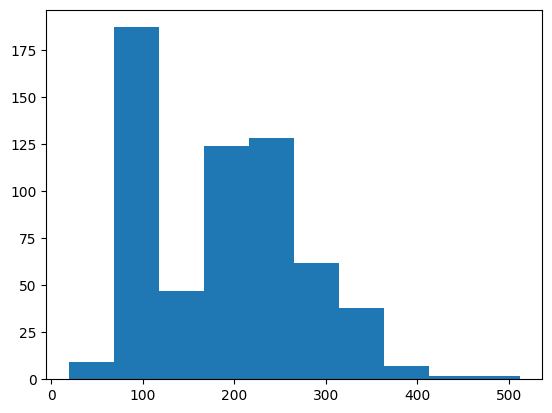

In [4]:
import matplotlib.pyplot as plt

plt.hist(df.cleaned_data.apply(lambda x : len(x.split())))

In [5]:
df[df.cleaned_data.isna()]

,abstract,title,DOI,created,score,URL,journal,data,cleaned_data


In [6]:
title_unik = list(df.journal.unique())
title_unik

['Studies in Mycology',
 'Administrative Science Quarterly',
 'Artificial Intelligence Review',
 'Progress in Orthodontics',
 'Annual Review of Astronomy and Astrophysics',
 'Journal of Finance']

In [7]:
journal_id = {title_unik[i] : i + 1 for i in range(len(title_unik))}
df['jid'] = df.journal.apply(lambda x : journal_id[x])
df

,abstract,title,DOI,created,score,URL,journal,data,cleaned_data,jid
0,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,Supplementary files,10.3114/sim.2022.101.01supp,"{'date-parts': [[2023, 3, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.101.01supp,Studies in Mycology,Supplementary files <jats:p>\n <jats:bold>F...,supplementary files fig s phylogenetic tr...,1
1,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,Supplementary files,10.3114/sim.2022.101.02supp,"{'date-parts': [[2023, 3, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.101.02supp,Studies in Mycology,Supplementary files <jats:p>\n <jats:bold>F...,supplementary files fig s phylogenetic tr...,1
2,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,Supplementary files,10.3114/sim.2022.102.01supp,"{'date-parts': [[2023, 3, 23]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.102.01supp,Studies in Mycology,Supplementary files <jats:p>\n <jats:bold>F...,supplementary files fig s multilocus phyl...,1
3,<jats:p>\n Supplementary files:&lt;br /&gt;...,Taxonomy and systematics of the fungus-growing...,10.3114/sim.2023.106.06-supp,"{'date-parts': [[2024, 2, 27]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2023.106.06-supp,Studies in Mycology,Taxonomy and systematics of the fungus-growing...,taxonomy and systematics of the fungusgrowing ...,1
4,<jats:p>\n Supplementary files. &lt;br /&gt...,In search of lost ergots: phylogenetic re-eval...,10.3114/sim.2022.106.01-supp,"{'date-parts': [[2024, 2, 27]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.106.01-supp,Studies in Mycology,In search of lost ergots: phylogenetic re-eval...,in search of lost ergots phylogenetic reevalua...,1
...,...,...,...,...,...,...,...,...,...,...
605,<jats:title>ABSTRACT</jats:title><jats:p>Recen...,Is There a Risk Premium in the Stock Lending M...,10.1111/jofi.13129,"{'date-parts': [[2022, 4, 4]], 'date-time': '2...",0.0,http://dx.doi.org/10.1111/jofi.13129,Journal of Finance,Is There a Risk Premium in the Stock Lending M...,recent research argues that uncertainty about ...,6
606,<jats:title>ABSTRACT</jats:title><jats:p>We pr...,Bayesian Solutions for the Factor Zoo: We Just...,10.1111/jofi.13197,"{'date-parts': [[2022, 12, 10]], 'date-time': ...",0.0,http://dx.doi.org/10.1111/jofi.13197,Journal of Finance,Bayesian Solutions for the Factor Zoo: We Just...,we propose a novel framework for analyzing lin...,6
607,<jats:title>ABSTRACT</jats:title><jats:p>In th...,Presidential Address: Sustainable Finance and ...,10.1111/jofi.13255,"{'date-parts': [[2023, 6, 20]], 'date-time': '...",0.0,http://dx.doi.org/10.1111/jofi.13255,Journal of Finance,Presidential Address: Sustainable Finance and ...,in this address i discuss differences across i...,6
608,<jats:title>ABSTRACT</jats:title><jats:p>This ...,Long‐Run Risk: Is It There?,10.1111/jofi.13126,"{'date-parts': [[2022, 3, 29]], 'date-time': '...",0.0,http://dx.doi.org/10.1111/jofi.13126,Journal of Finance,Long‐Run Risk: Is It There? <jats:title>ABSTRA...,this paper documents the existence of a persis...,6


In [8]:
# data = df['data'].astype(str).apply(comprehensive_preprocessing).tolist()

# - 1 - Studies in Mycology
# - 2 - Administrative Science Quarterly
# - 3 - Artificial Intelligence Review
# - 4 - Progress in Orthodontics
# - 5 - Annual Review of Astronomy and Astrophysics
# - 6 - Journal of Finance


jurnal_id = 1
jurnal_id = 2
# jurnal_id = 3
# jurnal_id = 4
# jurnal_id = 5
# jurnal_id = 6

data_jid = df[df['jid']==jurnal_id]
data = data_jid['cleaned_data']
data

39    paying for legitimacy autocracy nonmarket stra...
40    the impact of partner organizational structure...
41    the impact of mandated pay gap transparency on...
42    coconstructing community and entrepreneurial i...
43    regulatory spillover and workplace racial ineq...
44    defining who you are by whom you serve strateg...
45    corporate boards with street smarts how diffus...
46    brokers in disguise the joint effect of actual...
47    shaping nascent industries innovation strategy...
48    evidence in practice how structural and progra...
49    organizationasplatform activism theory and evi...
50    the dynamics of team learning harmony and rhyt...
51    good corp bad corp and the rise of b corps how...
52    doing organizational identity earnings surpris...
53    how beneficiaries become sources of normative ...
54    artisanal or just halfbaked competing collecti...
55    if i could turn back time occupational dynamic...
56    junkies queers and babies persistence and 

In [9]:
import torch
from transformers import BertTokenizer, AutoModel
from sklearn.cluster import KMeans
import numpy as np

# Load pre-trained IndoBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = AutoModel.from_pretrained('bert-base-multilingual-cased')

c:\Users\LENOVO\GitHub\Jurnal-Clustering\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
def tokenize_data(texts, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
                            text,
                            add_special_tokens=True,
                            max_length=max_length,
                            pad_to_max_length=True,
                            return_attention_mask=True,
                            return_tensors='pt'
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

# Tokenisasi data
input_ids, attention_masks = tokenize_data(data, tokenizer)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\LENOVO\GitHub\Jurnal-Clustering\.venv\lib\site-packages\transformers\tokenization_utils_base.py:2688: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [11]:
from torch.utils.data import Dataset, DataLoader

# Buat dataloader
class ArticleDataset(Dataset):
    def __init__(self, input_ids, attention_masks):
        self.input_ids = input_ids
        self.attention_masks = attention_masks

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx]
        }

    def __len__(self):
        return len(self.input_ids)

dataset = ArticleDataset(input_ids, attention_masks)

In [12]:
# Membuat dataloader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [13]:
import torch

device = 'cpu'
if torch.cuda.is_available() :
    device = 'cuda'

model.to(device)

# Set model ke mode evaluasi (non-training)
model.eval()

# Embedding
embeddings = []

with torch.no_grad():
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        last_hidden_states = outputs.last_hidden_state

        embeddings.append(last_hidden_states.cpu().numpy())

embeddings = np.concatenate(embeddings, axis=0)

KeyboardInterrupt: 

In [ ]:
from sklearn.decomposition import PCA

# Mengubah array embeddings menjadi matriks dua dimensi
X = embeddings.reshape(embeddings.shape[0], -1)

pca = PCA(n_components=2, random_state=0)
X = pca.fit_transform(X)

In [ ]:
# Perform KMeans clustering
num_clusters = 1
kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=1000)
kmeans.fit(X)

# Assign each journal to its cluster
cluster_labels = kmeans.labels_

In [ ]:
# import joblib

# # Simpan model KMeans
# filename = f"{jurnal_id}_kmeans.pkl"
# joblib.dump(kmeans, filename)
# print("Model KMeans telah disimpan dengan nama:", filename)


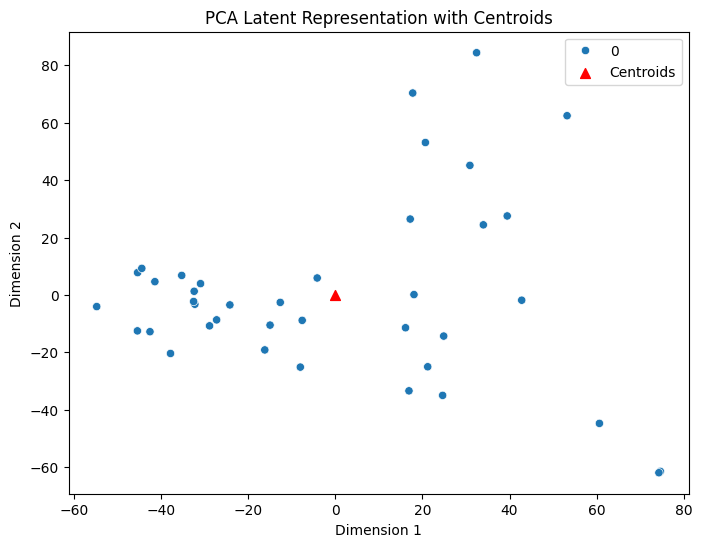

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels):
    # pca = PCA(n_components=2, random_state=0)
    # pca_result = pca.fit_transform(vector_representation)

    # df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    df_pca = pd.DataFrame(vector_representation, columns=['Dimension 1', 'Dimension 2'])
    df_pca['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_pca, palette=cluster_palette)
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        # centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroid = np.mean(vector_representation[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(X, cluster_labels)


In [ ]:
# Mendapatkan koordinat pusat cluster
centroid = kmeans.cluster_centers_

# Menghitung jarak antara setiap titik data dengan centroid
jarak_ke_centroid = np.sqrt(np.sum((X - centroid)**2, axis=1))

# Menentukan batas jarak yang dianggap sebagai "outscoop"
outscoop_threshold = np.mean(jarak_ke_centroid) + 2 * np.std(jarak_ke_centroid)

# Memisahkan data yang masih masuk dalam "scoop" dan "outscoop"
scoop_data = X[jarak_ke_centroid <= outscoop_threshold]
outscoop_data = X[jarak_ke_centroid > outscoop_threshold]

print(outscoop_threshold)

86.47204971313477


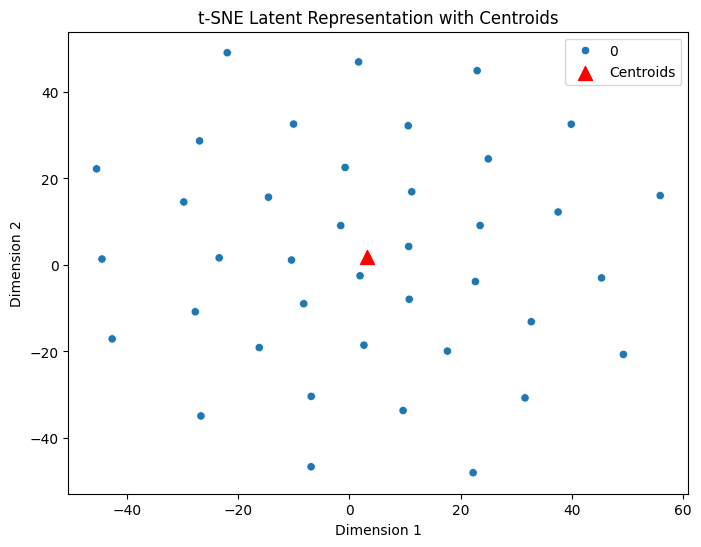

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

def plot_vector_distribution(vector_matrix, kmeans_labels):
    tsne = TSNE(random_state=0)
    tsne_result = tsne.fit_transform(vector_matrix)

    df_tsne = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
    df_tsne['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_tsne, palette=cluster_palette)
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(tsne_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=100, label='Centroids')
    
    plt.title('t-SNE Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(embeddings.reshape(embeddings.shape[0], -1), kmeans.labels_)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6068\3724749617.py:17: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')


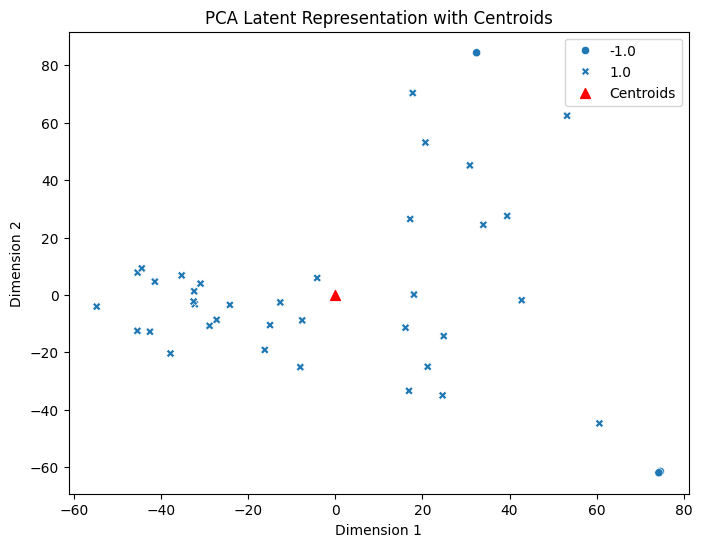

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels, scoop_labels):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation)

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    # df_pca['Cluster Label'] = kmeans_labels
    df_pca['Scoop Label'] = scoop_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

    return df_pca

# Menentukan label untuk scoop dan outscoop
scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > outscoop_threshold] = -1

df_pca = plot_vector_distribution(X, kmeans.labels_, scoop_labels)

In [ ]:
import os

# Assuming 'jurnal_id' is a variable containing the directory name
if not os.path.exists(f"./src/{jurnal_id}"):
  os.mkdir(f"./src/{jurnal_id}")


In [ ]:
import numpy as np
import joblib

# Simpan model KMeans
filename_kmeans = f"src/{jurnal_id}/{jurnal_id}_kmeans.pkl"
joblib.dump(kmeans, filename_kmeans)
print("Model KMeans telah disimpan dengan nama:", filename_kmeans)

# Simpan threshold
np.save(f"src/{jurnal_id}/{jurnal_id}_threshold.npy", outscoop_threshold)
print("Threshold telah disimpan.")

# Simpan data sebaran PCA
np.save(f"src/{jurnal_id}/{jurnal_id}_pca_data.npy", X)
print("Data sebaran PCA telah disimpan.")

# Simpan data sebaran multibert
np.save(f"src/{jurnal_id}/{jurnal_id}_bert_data.npy", embeddings.reshape(embeddings.shape[0], -1))
print("Data sebaran PCA telah disimpan.")


Model KMeans telah disimpan dengan nama: src/1/1_kmeans.pkl
Threshold telah disimpan.
Data sebaran PCA telah disimpan.
Data sebaran PCA telah disimpan.


In [ ]:
import pandas as pd

# Membuat DataFrame dengan data teks dan label scoop
df_res = pd.DataFrame({'Data': data,
                   'Label': scoop_labels})

# Memisahkan data dalam scoop dan outscoop
inScoop_df = df_res[df_res['Label'] == 1]
outScoop_df = df_res[df_res['Label'] == -1]

df_res.to_csv(f'src/{jurnal_id}/{jurnal_id}_data_jurnal.csv')
inScoop_df.to_csv(f'src/{jurnal_id}/{jurnal_id}_inscoop_data_jurnal.csv')
outScoop_df.to_csv(f'src/{jurnal_id}/{jurnal_id}_outscoop_data_jurnal.csv')

print("Data dalam scoop:")
print(inScoop_df)

print("\nData outscoop:")
print(outScoop_df)


Data dalam scoop:
                                                 Data  Label
0   supplementary files      fig s phylogenetic tr...    1.0
1   supplementary files      fig s phylogenetic tr...    1.0
2   supplementary files      fig s multilocus phyl...    1.0
3   taxonomy and systematics of the fungusgrowing ...    1.0
4   in search of lost ergots phylogenetic reevalua...    1.0
5   redisposition of acremoniumlike fungi in  hypo...    1.0
6   family matters inside the order agaricales sys...    1.0
7   revisingclonostachysand allied genera inbionec...    1.0
8   species diversity systematic revision and mole...    1.0
9   supplementary files      fig s phylogenetic tr...    1.0
10  a review of hyphodiscaceae in a recently publi...    1.0
11  supplementary files      fig s multilocus phyl...    1.0
12  supplementary files      supplementary informa...    1.0
14  a genomeinformed higher rank classification of...    1.0
15  the subfamily xerocomoideae boletaceae boletal...    1.0
16  a 

In [ ]:
# outScoop_df['Data'][1165]

In [ ]:
# inScoop_df['Data'][109]

### Predict

In [ ]:
from sklearn.decomposition import PCA

def fit_new_data_to_pca(new_data, pca):
    # Transformasi data baru ke ruang PCA yang sama dengan data lama
    new_data_pca = pca.transform(new_data.reshape(1, -1))

    return new_data_pca

In [ ]:
def predict_scoop(text_data, tokenizer, model, kmeans_model, scoop_threshold, pca_data):
    # Preprocess title and abstract
    processed_text = preprocess_text(text_data)

    # Tokenize new data
    encoded_dict = tokenizer.encode_plus(
        processed_text,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

    # Calculate embedding for new data
    input_ids = encoded_dict['input_ids'].to(device)
    attention_mask = encoded_dict['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        last_hidden_states = outputs.last_hidden_state
        new_embedding = last_hidden_states.cpu().numpy().reshape(1, -1)

    new_data_pca = fit_new_data_to_pca(new_embedding, pca)
    print("new data :", new_data_pca, "cluster center :", kmeans_model.cluster_centers_)

    # Calculate distance to centroid
    distance_to_centroid = np.sqrt(np.sum((new_data_pca - kmeans_model.cluster_centers_)**2, axis=1))
    print("Distance", distance_to_centroid, "threshold :", scoop_threshold)
    print("inscoop", distance_to_centroid <= scoop_threshold)

    # Determine if new data is in scoop or outscoop
    if distance_to_centroid <= scoop_threshold:
        prediction = "in scoop"
    else:
        prediction = "out scoop"

    return prediction, new_data_pca

In [ ]:
judul_baru = 'pengaruh penyuluhan cara menyikat gigi indeks plak gigi siswa inpres lapangan'
abstrak_baru ='penyuluhan cara menyikat gigi siswa sekolah dasar merupakan salah satu upaya promotif meningkatkan kesehatan gigi mulut anak tujuan penelitian ialah mengetahui pengaruh penyuluhan cara menyikat gigi indeks plak gigi siswa inpres lapanganpenelitian dilakukan inpres lapangan menggunakan metode penelitian quasy eksperimentaljumlah sampel diambil sebanyak siswa teknik pengambilan sampel total samplingpenelitian menggunakan uji analisis statistik wilcoxonhasil penelitian menunjukkan sebelum dilakukan penyuluhan cara menyikat gigi indeks plak awal ialah kategori sedang setelah dilakukan penyuluhan cara menyikat gigi indeks plak akhir ialah kategori baikhasil uji analisis statistik wilcoxon menunjukkan hasil analisis menunjukan pengaruh bermakna penyuluhan cara menyikat gigi indeks plak gigi siswa inpres lapangan'

text_data = judul_baru + abstrak_baru

text_data = "halo test ini bukan bagian dari cluster"

# Predict scoop for new data
scoop_prediction, new_embedding = predict_scoop(text_data, tokenizer, model, kmeans, outscoop_threshold, X)
print("Prediksi scoop untuk data baru:", scoop_prediction)

c:\Users\LENOVO\GitHub\Jurnal-Clustering\.venv\lib\site-packages\transformers\tokenization_utils_base.py:2688: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


new data : [[ 23.790297  -13.4325905]] cluster center : [[ 1.4671914e-06 -1.1859796e-06]]
Distance [27.320553] threshold : 86.47204971313477
inscoop [ True]
Prediksi scoop untuk data baru: in scoop


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6068\3623839592.py:16: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')


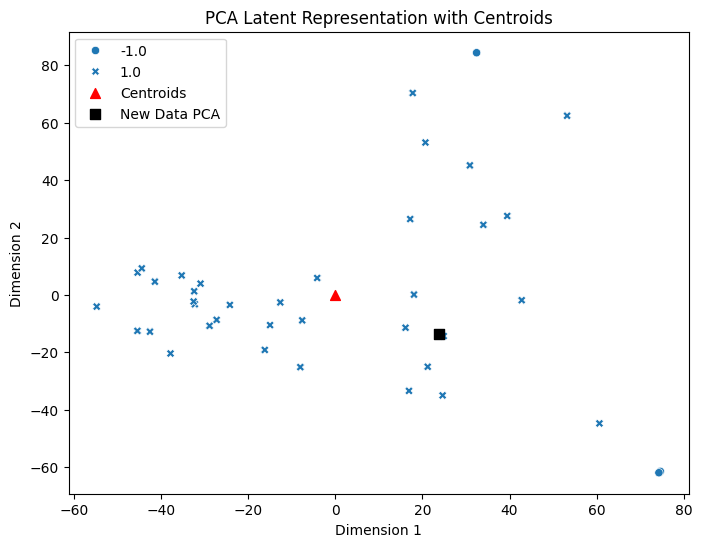

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels, scoop_labels, new_data_pca=None):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation)

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    df_pca['Scoop Label'] = scoop_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    # Menampilkan posisi data PCA baru
    if new_data_pca is not None:
        plt.scatter(new_data_pca[:, 0], new_data_pca[:, 1], marker='s', c='black', s=50, label='New Data PCA')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

    return df_pca


# Menentukan label untuk scoop dan outscoop
scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > outscoop_threshold] = -1

df_pca = plot_vector_distribution(X, kmeans.labels_, scoop_labels, new_embedding)